In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
pd.set_option('display.max_columns', 50)

#SK LEARN
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv('kc_house_data_train.csv',index_col=0)

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [4]:
#drop ID
df.drop(columns='id',inplace=True)

In [5]:
df.shape

#21 columns

(17290, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 0 to 17289
Data columns (total 20 columns):
date             17290 non-null object
price            17290 non-null float64
bedrooms         17290 non-null int64
bathrooms        17290 non-null float64
sqft_living      17290 non-null int64
sqft_lot         17290 non-null int64
floors           17290 non-null float64
waterfront       17290 non-null int64
view             17290 non-null int64
condition        17290 non-null int64
grade            17290 non-null int64
sqft_above       17290 non-null int64
sqft_basement    17290 non-null int64
yr_built         17290 non-null int64
yr_renovated     17290 non-null int64
zipcode          17290 non-null int64
lat              17290 non-null float64
long             17290 non-null float64
sqft_living15    17290 non-null int64
sqft_lot15       17290 non-null int64
dtypes: float64(5), int64(14), object(1)
memory usage: 2.8+ MB


In [7]:
# possibly figure out changing date column from string to date
# use months or days? 
#df['date']=pd.to_datetime(df['date'],yearfirst=True)

In [8]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [9]:
#maybe create dummy cols for view,condition,grade? 
#do we have to scale values? - sqft living, rooms
#zipcode to evaluate median income level? schools?
#lat/longitude -> near subway or park 
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c210e2c50>]],
      dtype=object)

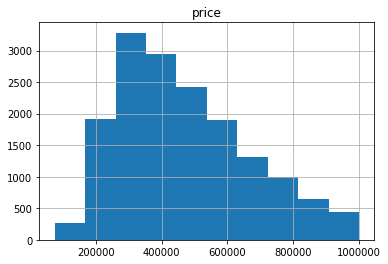

In [10]:
df=df[df['price'] <= 1000000]
#outliers 
#skews right
#cut out over 1000000 for more normal distribution
#double check this 

df.hist(column='price')

In [11]:
#grade and waterfront should be broken out - not wf but its useful
#view and condition doesn't seem to vary much
#maybe break out view into 0 or 4? -> 0 or 1

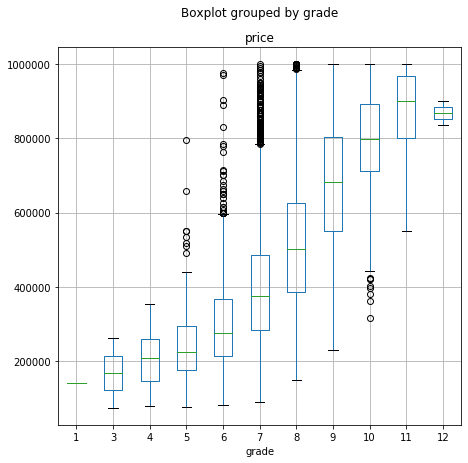

In [12]:
df.boxplot('price', by = 'grade',figsize=(7,7))

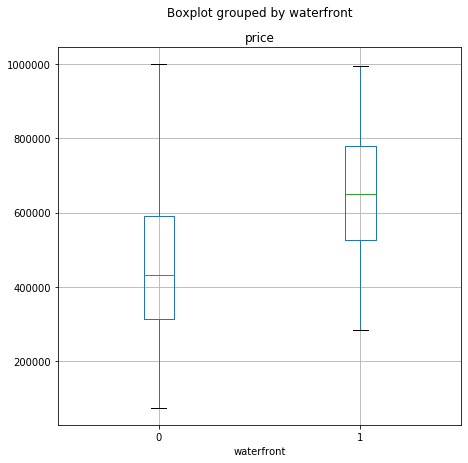

In [13]:
df.boxplot('price', by = 'waterfront',figsize=(7,7))

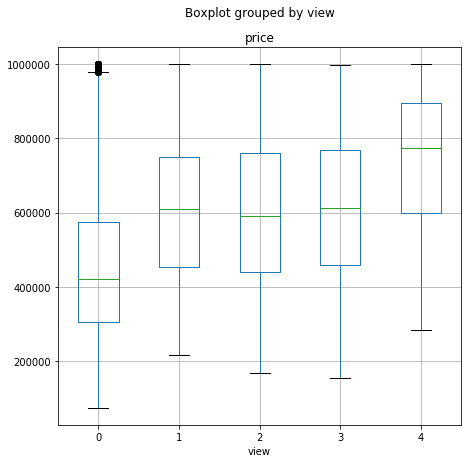

In [14]:
df.boxplot('price', by = 'view',figsize=(7,7))

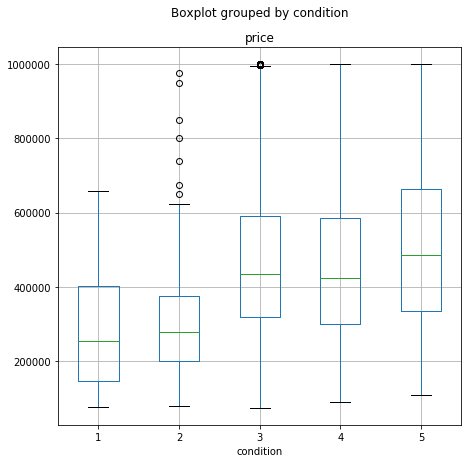

In [15]:
df.boxplot('price', by = 'condition',figsize=(7,7))

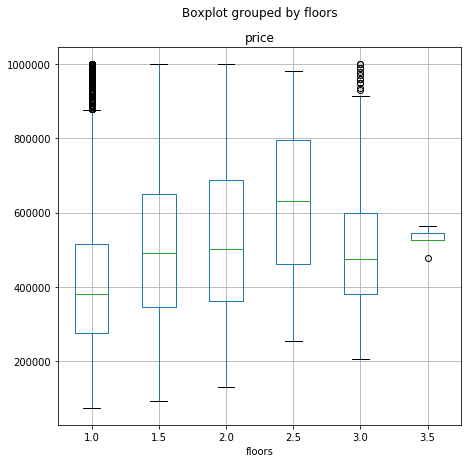

In [16]:
df.boxplot('price', by = 'floors',figsize=(7,7))
#look into

In [17]:
corr=df.corr()

In [18]:
corr



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.290422,0.443596,0.607769,0.090758,0.273637,0.052764,0.216607,0.033298,0.621512,0.520383,0.218675,0.065824,0.075452,-0.014642,0.439919,0.074778,0.551840,0.080660
bedrooms,0.290422,1.000000,0.481723,0.580288,0.022110,0.148853,-0.030194,0.033939,0.022207,0.313505,0.457961,0.277192,0.159116,-0.001380,-0.144453,-0.026084,0.134110,0.363358,0.017572
bathrooms,0.443596,0.481723,1.000000,0.713214,0.058197,0.498996,-0.004443,0.085075,-0.134723,0.605792,0.633320,0.216769,0.549594,0.022878,-0.209400,-0.017714,0.245865,0.516908,0.058980
sqft_living,0.607769,0.580288,0.713214,1.000000,0.149980,0.340827,0.005603,0.153489,-0.078797,0.694363,0.849375,0.371833,0.360597,0.016121,-0.207240,0.001499,0.282919,0.728488,0.165934
sqft_lot,0.090758,0.022110,0.058197,0.149980,1.000000,-0.016122,0.014834,0.076964,-0.007303,0.085177,0.156050,0.005358,0.041908,0.008576,-0.126401,-0.092441,0.214248,0.134817,0.682749
floors,0.273637,0.148853,0.498996,0.340827,-0.016122,1.000000,-0.002098,-0.018842,-0.274128,0.458320,0.533498,-0.302442,0.509909,-0.003784,-0.068383,0.032279,0.140578,0.270545,-0.020195
waterfront,0.052764,-0.030194,-0.004443,0.005603,0.014834,-0.002098,1.000000,0.296488,0.008927,-0.008653,-0.002569,0.014971,-0.037485,0.062463,0.046615,-0.045151,-0.061188,0.003589,0.026300
view,0.216607,0.033939,0.085075,0.153489,0.076964,-0.018842,0.296488,1.000000,0.030269,0.120261,0.055154,0.189364,-0.064998,0.049026,0.104973,-0.034287,-0.076364,0.171087,0.076844
condition,0.033298,0.022207,-0.134723,-0.078797,-0.007303,-0.274128,0.008927,0.030269,1.000000,-0.169333,-0.180098,0.169750,-0.347136,-0.056950,-0.003676,-0.014304,-0.100501,-0.123622,-0.000639
grade,0.621512,0.313505,0.605792,0.694363,0.085177,0.458320,-0.008653,0.120261,-0.169333,1.000000,0.702092,0.060639,0.498567,-0.025804,-0.187365,0.080524,0.230178,0.662258,0.094801


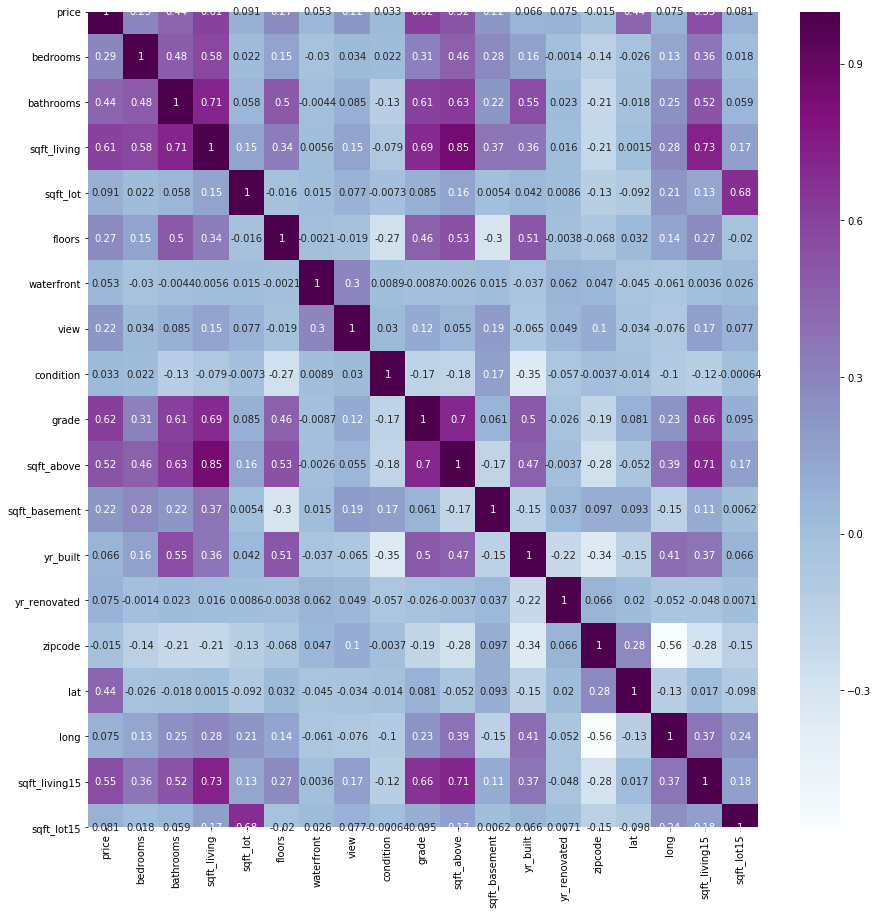

In [19]:
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr,cmap="BuPu",annot=True)

In [20]:
corr[abs(corr > 0.70)] #easier to pick out highly correlated
#sqft living and sqft above highly correlated?
#swfit living and bedroom/bath highly correlated?

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,NaN,NaN,1.000000,0.713214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_living,NaN,NaN,0.713214,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.849375,NaN,NaN,NaN,NaN,NaN,NaN,0.728488,NaN
sqft_lot,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floors,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
grade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.702092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df.corr()['price'].sort_values()

zipcode         -0.014642
condition        0.033298
waterfront       0.052764
yr_built         0.065824
long             0.074778
yr_renovated     0.075452
sqft_lot15       0.080660
sqft_lot         0.090758
view             0.216607
sqft_basement    0.218675
floors           0.273637
bedrooms         0.290422
lat              0.439919
bathrooms        0.443596
sqft_above       0.520383
sqft_living15    0.551840
sqft_living      0.607769
grade            0.621512
price            1.000000
Name: price, dtype: float64

In [22]:
df['yr_renovated'].value_counts()
#possibly break out to 0 and 1

0       15534
2014       63
2000       27
2007       26
2013       25
        ...  
1951        1
1956        1
1934        1
1959        1
1948        1
Name: yr_renovated, Length: 69, dtype: int64

In [23]:
test1 = ols(formula = 'price~bedrooms+bathrooms+yr_built+waterfront+grade+sqft_living',data=df).fit()
test1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     3137.
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        17:48:41   Log-Likelihood:            -2.1322e+05
No. Observations:               16128   AIC:                         4.265e+05
Df Residuals:                   16121   BIC:                         4.265e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.477e+06   8.64e+04     51.785      0.000    4.31e+06    4.65e+06
bedrooms    -1.341e+04   1443.350     -9.294      0.000   -1.62e+04   -1.06e+04
bathrooms    3.732e+04   2426.879     15.380      0.000    3.26e+04    4.21e+04
yr_built    -2520.7959     45.813    -55.023      0.000   -2610.595   -2430.997
waterfront   1.467e+05   1.95e+04      7.508      0.000    1.08e+05    1.85e+05
grade        1.019e+05   1572.747     64.789      0.000    9.88e+04    1.05e+05
sqft_living    82.8921      2.512     33.003      0.000      77.969      87.815
==============================================================================
Omnibus:                      329.781   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              381.371
Skew:                           0.306   Prob(JB):                     1.54e-83
Kurtosis:                       3.440   Cond. No.                     2.33e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
df.isnull().sum() #no nulls

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

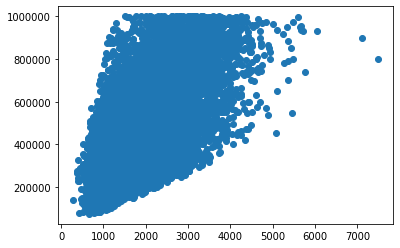

In [25]:
plt.scatter(df['sqft_living'],df['price'])

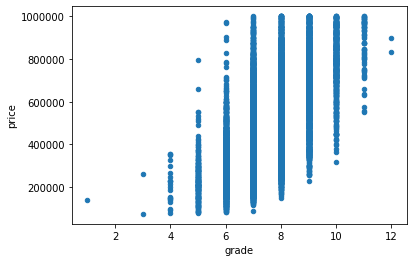

In [26]:
df.plot.scatter(x='grade',y='price')
#ok numbers represent order 


In [27]:
#df['date'] = df['date'].astype(str) #drop this?

In [28]:
#df['date'] = pd.to_datetime(df['date'], format='%y%m%d.T000000')

In [29]:
df['yr_old'] =  df['yr_built'].map(lambda x: 2016-x)

In [30]:
df['yr_old'].describe() #shows years old of each house

count    16128.000000
mean        45.481151
std         29.072409
min          1.000000
25%         21.000000
50%         42.000000
75%         65.000000
max        116.000000
Name: yr_old, dtype: float64

In [31]:
df['yr_since_reno'] =  df['yr_renovated'].map(lambda x: 2016-x if x > 0 else 0)

In [32]:
df['yr_since_reno'].value_counts()

0     15534
2        63
16       27
9        26
3        25
      ...  
72        1
57        1
65        1
82        1
60        1
Name: yr_since_reno, Length: 69, dtype: int64

In [33]:
df.head(50)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old,yr_since_reno
0,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,30,0
1,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,39,0
4,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,12,0
5,20140827T000000,211000.0,4,2.00,1710,8288,1.5,0,0,3,7,1710,0,1970,0,98031,47.3947,-122.174,1710,7200,46,0
6,20140819T000000,790000.0,4,2.50,2690,8036,2.0,0,0,4,9,2690,0,1987,0,98007,47.6596,-122.144,2420,8087,29,0
7,20141017T000000,680000.0,3,2.50,1800,4400,1.0,0,0,5,7,1350,450,1970,0,98199,47.6599,-122.396,1920,4400,46,0
8,20140804T000000,384500.0,3,2.50,1600,2610,2.0,0,0,3,8,1600,0,2005,0,98027,47.5344,-122.068,1445,1288,11,0
9,20140516T000000,605000.0,2,1.00,910,3600,1.0,0,0,4,7,910,0,1909,0,98119,47.6341,-122.361,1720,3600,107,0
10,20150422T000000,638000.0,3,1.00,1830,4400,1.5,0,0,4,8,1720,110,1930,0,98122,47.6052,-122.300,1650,4400,86,0
11,20150303T000000,385000.0,3,1.75,1930,14389,1.0,0,0,3,7,1130,800,1963,1998,98155,47.7733,-122.317,1730,14378,53,18


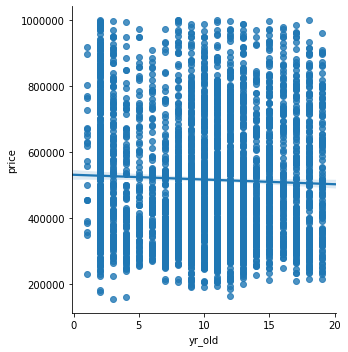

In [34]:
#visualizing price and yr old.... linear? 
sns.lmplot(x='yr_old',y='price',data=df[df['yr_old']<20],fit_reg=True)

In [35]:
features=['bedrooms','bathrooms','sqft_living','grade','yr_old','waterfront','sqft_lot','floors','yr_since_reno']

In [36]:
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]

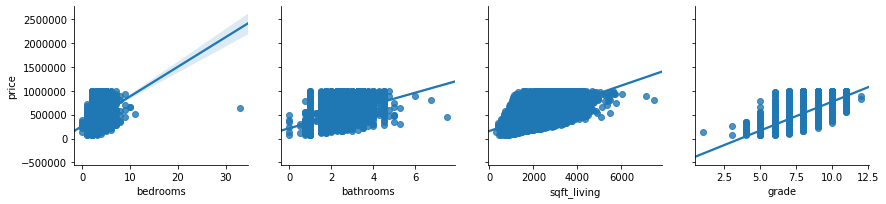

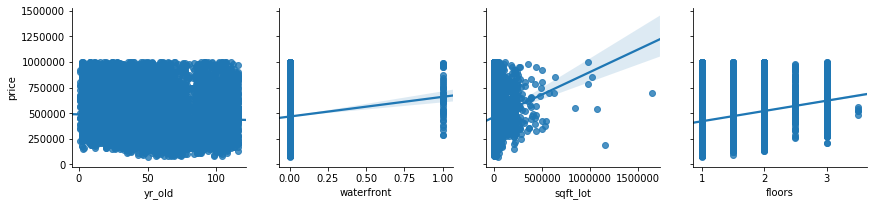

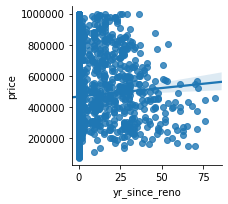

In [37]:
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['price'],x_vars=i, kind="reg", height=3)

In [38]:
df['zipcode'].nunique()

70

In [39]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old,yr_since_reno
0,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,30,0
1,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,39,0
4,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,12,0
5,20140827T000000,211000.0,4,2.00,1710,8288,1.5,0,0,3,7,1710,0,1970,0,98031,47.3947,-122.174,1710,7200,46,0
6,20140819T000000,790000.0,4,2.50,2690,8036,2.0,0,0,4,9,2690,0,1987,0,98007,47.6596,-122.144,2420,8087,29,0


In [40]:
df2=df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','zipcode','yr_old','yr_since_reno']]

In [41]:
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,yr_old,yr_since_reno
0,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,98058,30,0
1,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,98115,39,0
4,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,98052,12,0
5,211000.0,4,2.00,1710,8288,1.5,0,0,3,7,98031,46,0
6,790000.0,4,2.50,2690,8036,2.0,0,0,4,9,98007,29,0


In [42]:
zipcode_dummy = pd.get_dummies(df2['zipcode'],prefix = 'zip', drop_first=True)
df2 = pd.concat([df2, zipcode_dummy], axis = 1)

In [43]:
pd.set_option('display.max_columns', 100)

In [44]:
df2.drop(columns='zipcode',inplace=True)

In [45]:
df2['bedrooms']=df2['bedrooms'].map(lambda x: x if x < 15 else 15)

In [46]:
target=df2.price

In [53]:
features_cols=list(df2.columns)

In [54]:
features_cols=features_cols[1:]

In [56]:
len(features_cols)


80

In [57]:
features2=df2[features_cols]

In [58]:
#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(features2, target, random_state=34,test_size=0.2)


In [59]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

print(lm.intercept_)
print(lm.coef_)


-382313.1665228743
[-4.48698141e+03  6.97367325e+03  1.06574129e+02  2.99733398e-01
  1.87003633e+03  1.46484352e+05  2.91230355e+04  1.85943621e+04
  5.06605066e+04  5.78252340e+02  1.20005797e+02  1.12163334e+03
 -9.30393469e+03  4.90528342e+05  3.16111395e+05  2.74592204e+05
  2.44470072e+05  2.43020114e+05  1.03215250e+05  1.50424809e+05
  1.03307362e+05  1.05457436e+05  4.59377710e+03 -1.87256972e+04
  1.67586232e+05  1.93256947e+05  1.36751431e+05  2.33618978e+05
  6.00768854e+03  1.36034279e+04 -6.33940385e+03  3.03221628e+05
  1.80589426e+05  4.87000555e+04  6.43066298e+05  4.10695289e+05
  1.91392286e+04  1.02875536e+05  2.59078608e+05  2.58258606e+05
  3.80076403e+04  1.02502096e+05  4.04621544e+04  1.13787050e+05
  1.46117510e+05  1.06230326e+05  1.88170875e+05  2.29078348e+05
  2.57035296e+05  1.83660600e+05 -7.51390002e+03  3.71439529e+05
  2.92910107e+05  3.44778554e+05  1.00908605e+05  2.92722352e+05
  9.28784282e+04  3.55627908e+05  3.82099528e+05  2.90929842e+05
  2.68

In [60]:
print ("R^2 Score:", lm.score(X_train, y_train))


R^2 Score: 0.8214625723951516


In [61]:
y_train_pred = lm.predict(X_train)

In [62]:
from sklearn import metrics

train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 61139.994771248224
Mean Squared Error: 6861172020.763439
Root Mean Squared Error: 82832.19193504081


In [63]:
target_std=target.std()

In [65]:
print('Mean Absolute Error:', train_mae/target_std )
print('Root Mean Squared Error:' , train_rmse/target_std)

Mean Absolute Error: 0.3110909146660475
Root Mean Squared Error: 0.4214645822145752


In [66]:
y_pred = lm.predict(X_test)

In [67]:
print ("Score:", lm.score(X_test, y_test))

Score: 0.8227166687246792


In [68]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error:62128.544365959475
Mean Squared Error:6984008441.797333
Root Mean Squared Error:83570.38017023336


In [70]:
print('Mean Absolute Error  Z:', test_mae/target_std )
print('Root Mean Squared Error Z:' , test_rmse/target_std)

Mean Absolute Error  Z: 0.3161208267352597
Root Mean Squared Error Z: 0.42522061219365787


In [71]:
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Training:  82832 vs. Testing:  83570
